In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r"D:\unnesscary saves\IBM Hack Challenge\ModelDeployment\Placement_Data_Full_Class.csv")

In [3]:
data


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


ANALYSIS OF DATASET :-

In [4]:
data.head

<bound method NDFrame.head of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech  

In [5]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
data.shape

(215, 15)

In [7]:
data.info

<bound method DataFrame.info of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech

In [8]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
data.isnull()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
lst=['gender','hsc_s','degree_t','workex','specialisation']
for label in lst:#encoding data
  data[label]=LabelEncoder().fit(data[label]).transform(data[label])
col=['ssc_p','hsc_p','workex','mba_p','status']

In [12]:
data.head

<bound method NDFrame.head of      sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00   Others  91.00   Others      1     58.00         2   
1        2       1  79.33  Central  78.33   Others      2     77.48         2   
2        3       1  65.00  Central  68.00  Central      0     64.00         0   
3        4       1  56.00  Central  52.00  Central      2     52.00         2   
4        5       1  85.80  Central  73.60  Central      1     73.30         0   
..     ...     ...    ...      ...    ...      ...    ...       ...       ...   
210    211       1  80.60   Others  82.00   Others      1     77.60         0   
211    212       1  58.00   Others  60.00   Others      2     72.00         2   
212    213       1  67.00   Others  67.00   Others      1     73.00         0   
213    214       0  74.00   Others  66.00   Others      1     58.00         0   
214    215       1  62.00  Central  58.00   Others      2     53.00         0  

Text(0.5, 1.0, 'Salary')

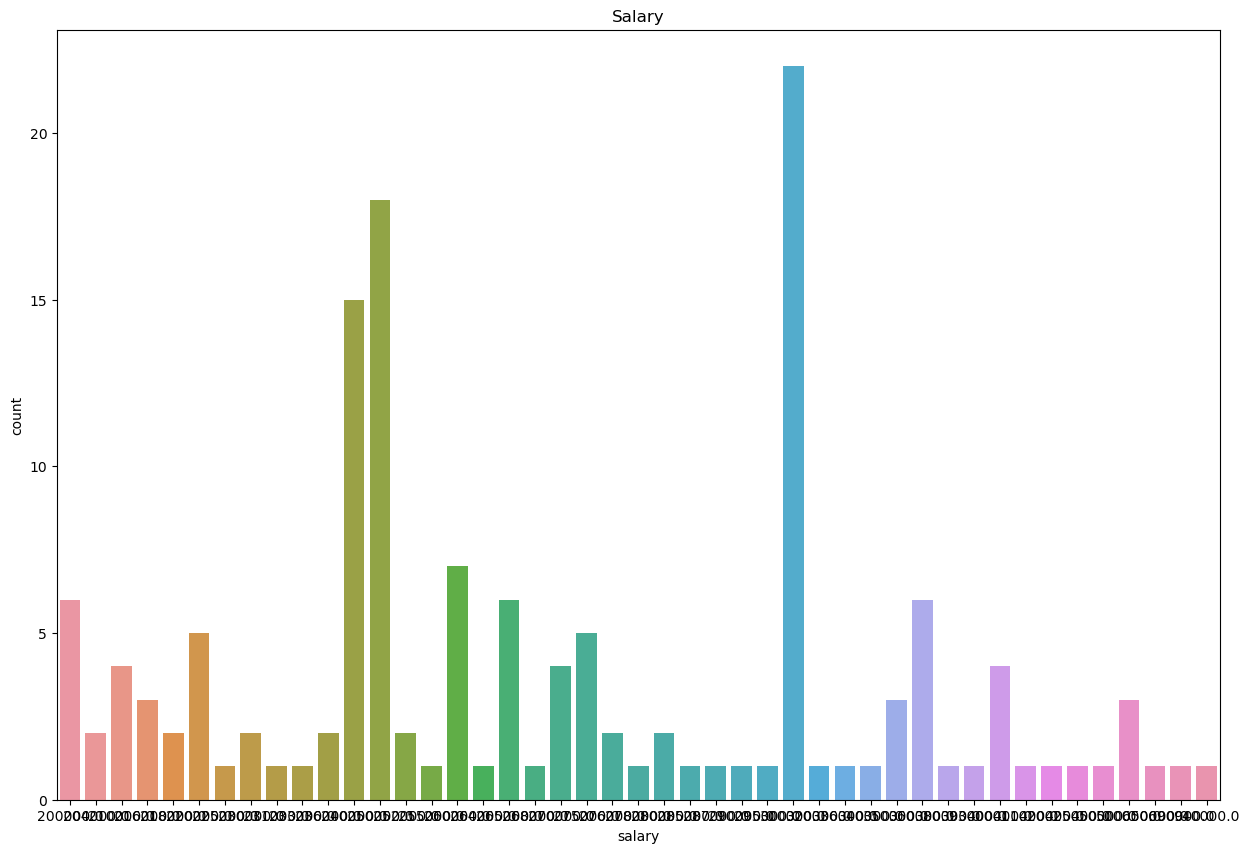

In [13]:
fig, plot1 = plt.subplots(figsize=(15, 10))
sns.countplot(x =data['salary'], data =data,ax=plot1).set_title("Salary")

Text(0.5, 1.0, 'Male vs Female ratio')

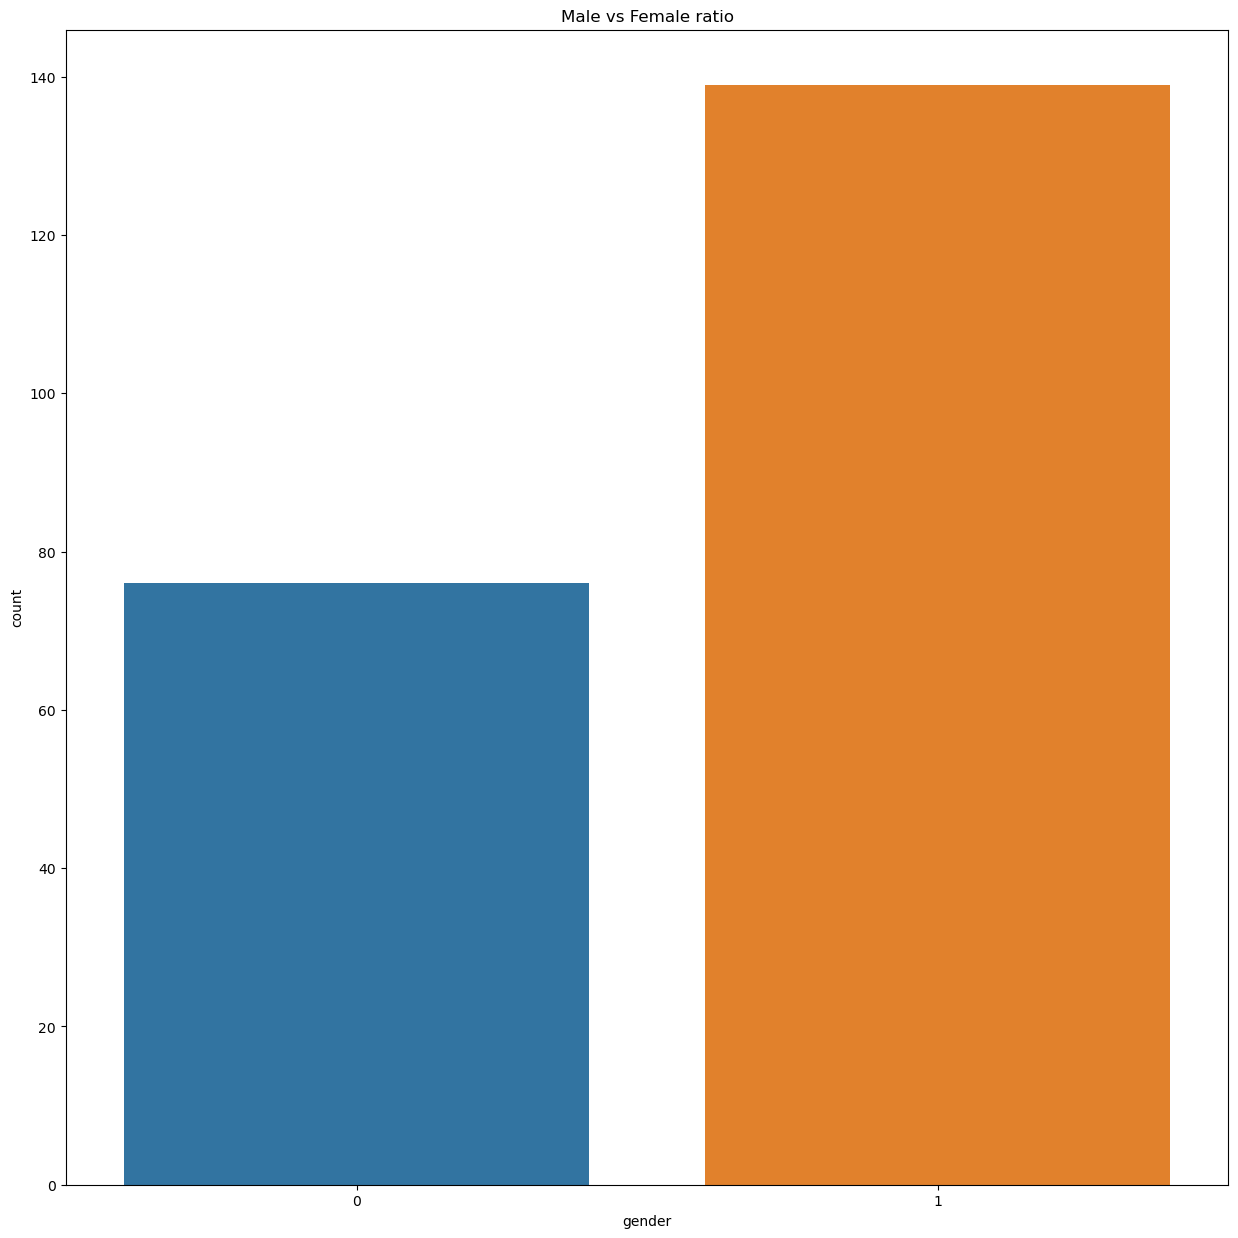

In [14]:
fig,plot2=plt.subplots(figsize=(15, 15))
sns.countplot(x =data['gender'], data =data,ax=plot2).set_title("Male vs Female ratio")

In [15]:
comparsion=data[["workex","salary"]]


comparison=comparsion.head(10)

Text(0.5, 1.0, 'Comparison based on the salary if the salary is better with work experience')

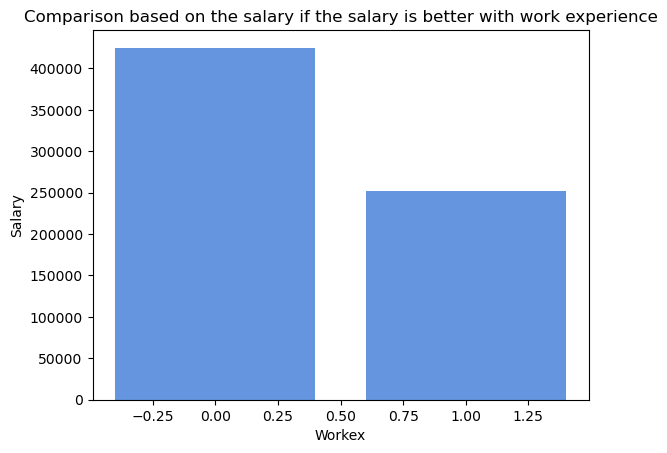

In [16]:
plt.bar(comparison["workex"],comparison["salary"],color="#6495DE")
plt.xlabel("Workex")
plt.ylabel("Salary")
plt.title("Comparison based on the salary if the salary is better with work experience")

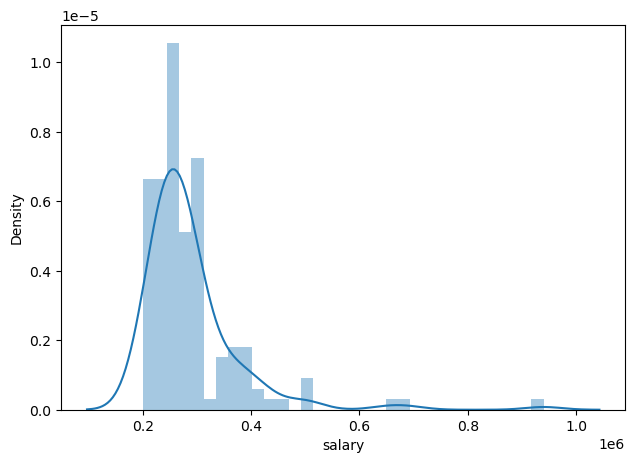

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data["salary"])

plt.show()

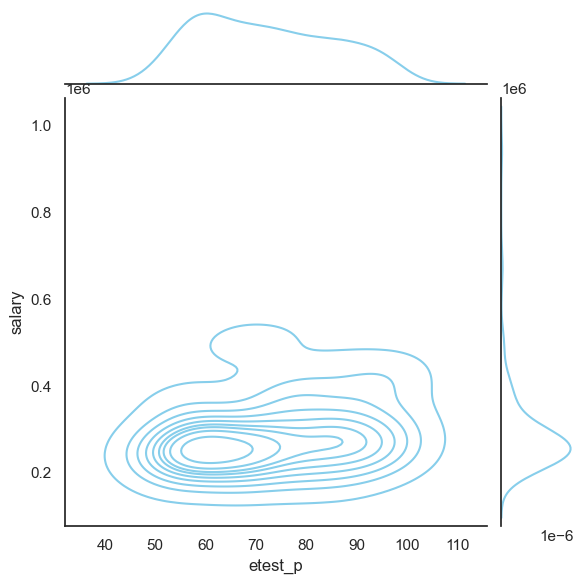

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")


Not many candidates received salary more than 4 lakhs PA

# Classification and Regression

In [19]:
data_clf=data.copy()
data_reg=data.copy()

## Classification Using SVC

In [20]:
data_clf.drop(['sl_no','ssc_b','hsc_b','salary'],axis=1,inplace=True)#removing unnecessary columns
X=data_clf.drop(['status'],axis=1)
Y=data_clf['status']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(data.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)
     


(215, 15) (161, 10) (54, 10) (161,) (54,)


from sklearn.svm import SVC
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train, y_train)
pred_test_linear = model_linear.predict(X_test)

np.mean(pred_test_linear == y_test)


model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train, y_train)
pred_test_rbf = model_rbf.predict(X_test)

np.mean(pred_test_rbf==y_test)

model_poly = SVC(kernel = "poly")
model_poly.fit(X_train, y_train)
pred_test_poly= model_poly.predict(X_test)

np.mean(pred_test_poly==y_test)

In [22]:
pd.DataFrame({'Model':['Linear','RBF','Polynomial'],'Accuracy':[0.8148148148148148,0.7592592592592593,0.7222222222222222]})

,Model,Accuracy
0,Linear,0.814815
1,RBF,0.759259
2,Polynomial,0.722222


## Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
reg = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


## Decision Tree 

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7592592592592593


In [26]:
import pickle
filename= 'savemodel.sav'
pickle.dump(logreg, open(filename, 'wb'))



In [27]:
load_model = pickle.load(open(filename, 'rb'))

In [28]:
X_test.head(5)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
198,0,67.0,70.0,1,65.0,1,0,88.00,1,71.96
37,0,79.0,76.0,2,65.6,2,0,58.00,1,55.47
89,0,84.0,75.0,2,69.0,2,1,62.00,1,62.36
168,0,48.0,51.0,1,58.0,0,1,60.00,1,58.79
171,1,80.0,80.0,1,72.0,0,1,63.79,0,66.04


In [29]:
load_model.predict([[0, 67.0, 70.0, 1, 65.0, 1, 0, 88.00, 1, 71.96]])

array(['Not Placed'], dtype=object)